In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from scipy.optimize import minimize

# Part 1

In [3]:
def cube(x):
    return x ** 3


def absolut(x):
    return np.abs(x - 0.2)


def xsin(x):
    return x * np.sin(1 / x)

cube_bounds = (0, 1)
absolut_bounds = (0, 1)
xsin_bounds = (0.01, 1)

eps = 0.001

In [4]:
cube_arr = np.arange(*cube_bounds, eps)
absolut_arr = np.arange(*absolut_bounds, eps)
xsin_arr = np.arange(*xsin_bounds, eps)

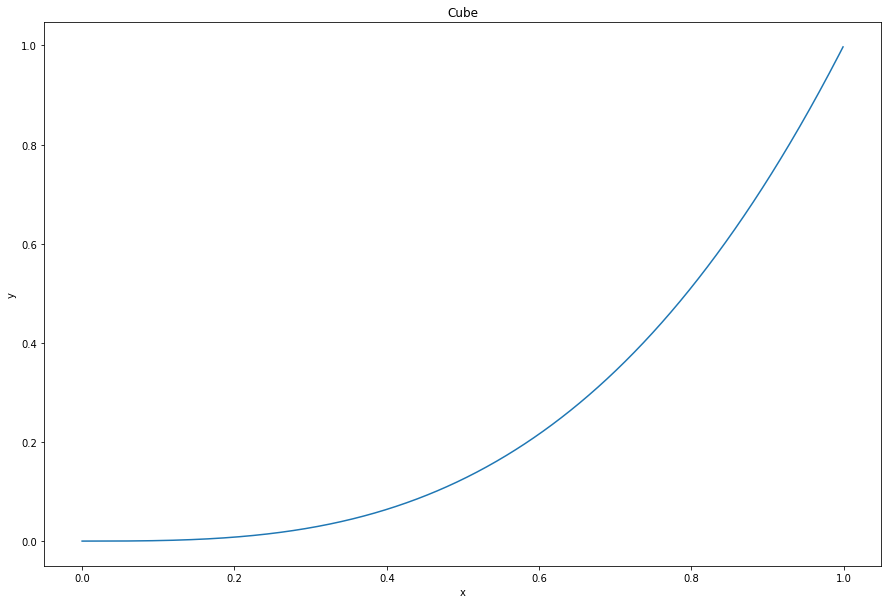

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(cube_arr, cube(cube_arr), label="Experimental")
plt.title('Cube')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('./Pictures/task2_cube', bbox_inches='tight')
plt.show()

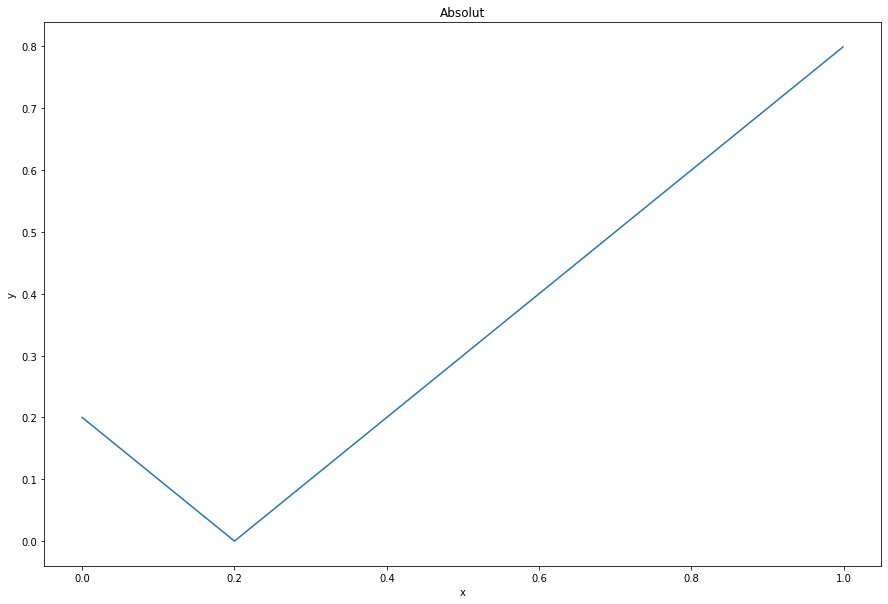

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(absolut_arr, absolut(absolut_arr), label="Experimental")
plt.title('Absolut')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('./Pictures/task2_abs', bbox_inches='tight')
plt.show()

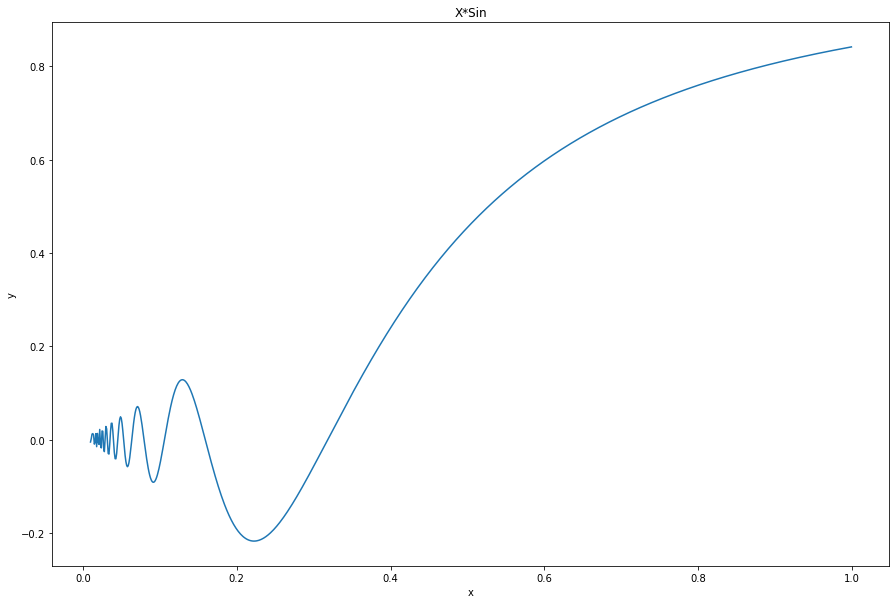

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(xsin_arr, xsin(xsin_arr), label="Experimental")
plt.title('X*Sin')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('./Pictures/task2_xsin', bbox_inches='tight')
plt.show()

In [8]:
def brute_force(func, arr):
    y_min = np.inf
    x_min = np.inf
    iter = 0
    for x in arr:
        iter += 1
        y = func(x)
        if y < y_min:
            y_min = y
            x_min = x
    return x_min, y_min, iter

In [9]:
def dichotomy_method(func, arr):
    iter = 0
    ai = arr[0]
    bi = arr[-1]
    delta = 0.5*eps
    while (bi-ai) / 2 > eps:
        iter += 1
        ci = (ai + bi) * 0.5 - 0.5 * delta
        di = (ai + bi) * 0.5 + 0.5 * delta
        if func(ci) <= func(di):
            bi = di
        else:
            ai = ci
    return ai, func(ai), iter


In [10]:
def golden_ratio_method(func, arr):
    iters = 0
    a = arr[0]
    b = arr[-1]
    c1 = (3 - np.sqrt(5)) / 2
    c2 = (np.sqrt(5) - 3) / 2
    while np.abs(a - b) > eps:
        iters += 1

        x1, x2 = (a + c1 * (b - a), b + c2 * (b - a))

        fx1 = func(x1)
        fx2 = func(x2)
        if fx1 < fx2:
            a1, b1 = a, x2
        elif fx1 > fx2:
            a1, b1 = x1, b
        else:
            a1, b1 = x1, x2
        a, b = a1, b1
    x_min = (a + b) / 2
    f_min = func(x_min)
    return f_min, x_min, iters

In [11]:
print(brute_force(cube, cube_arr))
print(brute_force(absolut, absolut_arr))
print(brute_force(xsin, xsin_arr))

(0.0, 0.0, 1000)
(0.2, 0.0, 1000)
(0.22299999999999984, -0.21722461258083448, 990)


In [12]:
print(dichotomy_method(cube, cube_arr))
print(dichotomy_method(absolut, absolut_arr))
print(dichotomy_method(xsin, xsin_arr))

(0.0, 0.0, 10)
(0.198919921875, 0.0010800781250000224, 10)
(0.2214077148437498, -0.21717564455802704, 10)


In [13]:
print(golden_ratio_method(cube, cube_arr))
print(golden_ratio_method(absolut, absolut_arr))
print(golden_ratio_method(xsin, xsin_arr))

(4.9109178176301246e-11, 0.0003662021492107742, 15)
(0.00012675957015778616, 0.19987324042984222, 15)
(-0.21723354465943503, 0.2225047253432197, 15)


# Part 2

In [62]:
alpha = np.random.exponential(0.45)
betta = np.random.exponential(0.45)
print('alpha=' + str(alpha) + ' betta=' + str(betta))

alpha=0.04324301336584201 betta=0.044975644462618924


In [63]:
noisy_x = [k/100 for k in range(100)]
noisy_x = np.array(list(noisy_x))
noisy_x[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [64]:
noisy_y = alpha*noisy_x + betta + np.random.normal(0, 1, size=len(noisy_x))
noisy_y[:5]

array([ 0.65169417,  0.80180916,  1.04092483,  1.44144464, -1.06547058])

In [65]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

In [68]:
def approximate(func, a, b, predictors=noisy_x, target=noisy_y):
    return np.sum( (func(predictors, a, b) - target) ** 2 )

In [69]:
def quadro_brute_force(func, bounds=( (0,1), (0,1) ), x = noisy_x, y = noisy_y ):
    a_best = 0
    b_best = 0
    D_best = np.inf
    a_arr = np.arange(bounds[0][0], bounds[0][1], eps)
    b_arr = np.arange(bounds[1][0], bounds[1][1], eps)
    iter = 0
    for ai in tqdm(a_arr):
        D = approximate(func, ai, b_best, predictors=x, target=y)
        for bj in b_arr:
            iter += 1
            D = approximate(func, a_best, bj, predictors=x, target=y)
            if D < D_best:
                D_best = D
                a_best = ai
                b_best = bj
    return D, a_best, b_best, iter

In [70]:
_, a_l, b_l, _ = quadro_brute_force(linear, bounds=( (0,1), (0,1) ))

100%|██████████| 1000/1000 [00:09<00:00, 107.74it/s]


In [71]:
_, a_r, b_r, _ = quadro_brute_force(rational, bounds=( (0,1), (0,1) ))

100%|██████████| 1000/1000 [00:10<00:00, 91.76it/s]


In [72]:
def gauss_zeidel(func,a, b, x = noisy_x, y = noisy_y):
    a_best = a
    b_best = b
    a_old = 15000
    b_old = 15000
    iter = 0
    while np.abs((a_best-a_old + b_best-b_old)) > eps:
        a_old = a_best
        b_old = b_best
        new_func_a = lambda ai: approximate(func, ai, b_old, predictors=x, target=y)
        a_best = minimize(new_func_a, x0=a_old, bounds=((0,1),),method="L-BFGS-B").x
        new_func_b = lambda bi: approximate(func, a_old, bi, predictors=x, target=y)
        b_best = minimize(new_func_b, b_old, bounds=((0,1),),method="L-BFGS-B").x
        iter += 1
    return a_best, b_best, iter

In [73]:
a,b,i = gauss_zeidel(linear,a=alpha, b=betta, x = noisy_x, y = noisy_y)
print(str(a))
print(str(b))

[0.]
[0.04792686]


In [74]:
a_r_g,b_r_g,i_r_g = gauss_zeidel(rational,a=alpha, b=betta, x = noisy_x, y = noisy_y)
print(str(a_r_g))
print(str(b_r_g))

[0.07661103]
[1.]


In [75]:
def approximate(func, coef, predictors=noisy_x, target=noisy_y):
    return np.sum( (func(predictors, coef[0], coef[1]) - target) ** 2 )

In [76]:
nelder = lambda a_n: approximate(linear, a_n, predictors=noisy_x, target=noisy_y)

In [77]:
a_n, b_n = minimize(nelder, x0=((0, 0)),bounds=((0, 1), (0, 1)), method="Nelder-Mead").x

In [78]:
print(str(a_n))
print(str(b_n))

0.0
0.04790072114934449


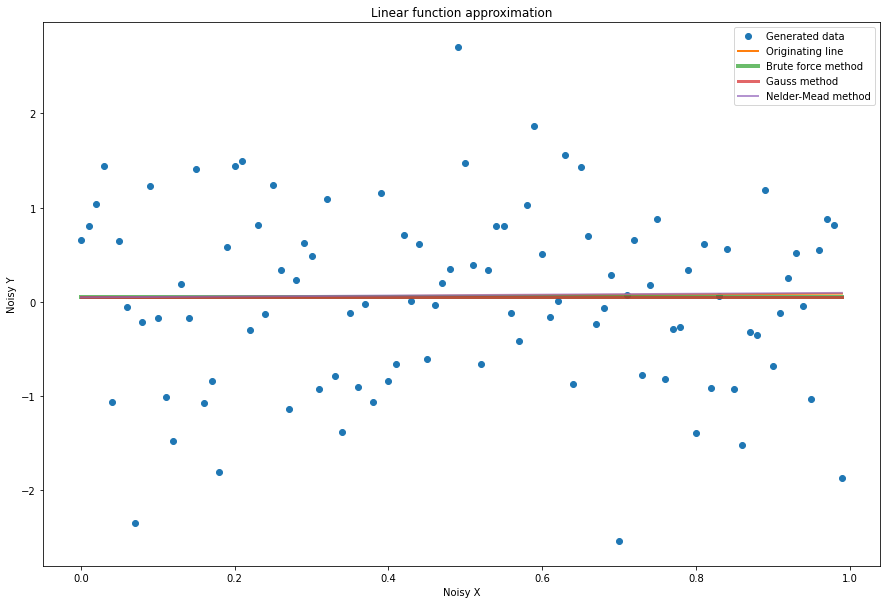

In [82]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, linear(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, linear(noisy_x, a=a_l, b=b_l) , linewidth=4, alpha=0.7,
         label="Brute force method")
plt.plot(noisy_x, linear(noisy_x, a=a, b=b), linewidth=3, alpha=0.7,
         label="Gauss method")
plt.plot(noisy_x, linear(noisy_x, a=b_n, b=b_n), linewidth=2, alpha=0.7,
         label="Nelder-Mead method")
plt.title('Linear function approximation')
plt.legend()
plt.xlabel('Noisy X')
plt.ylabel('Noisy Y')
plt.savefig('./Pictures/task2_Linear_approx', bbox_inches='tight')
plt.show()

In [80]:
def approximate(func, coef, predictors=noisy_x, target=noisy_y):
    return np.sum((func(predictors, coef[0], coef[1]) - target) ** 2)


nelder = lambda a_n: approximate(rational, a_n, predictors=noisy_x, target=noisy_y)
a_n_r, b_n_r = minimize(nelder, x0=((0, 0)), bounds=((0, 1), (0, 1)), method="Nelder-Mead").x
print(str(a_n_r))
print(str(b_n_r))

0.04793750000000003
0.0


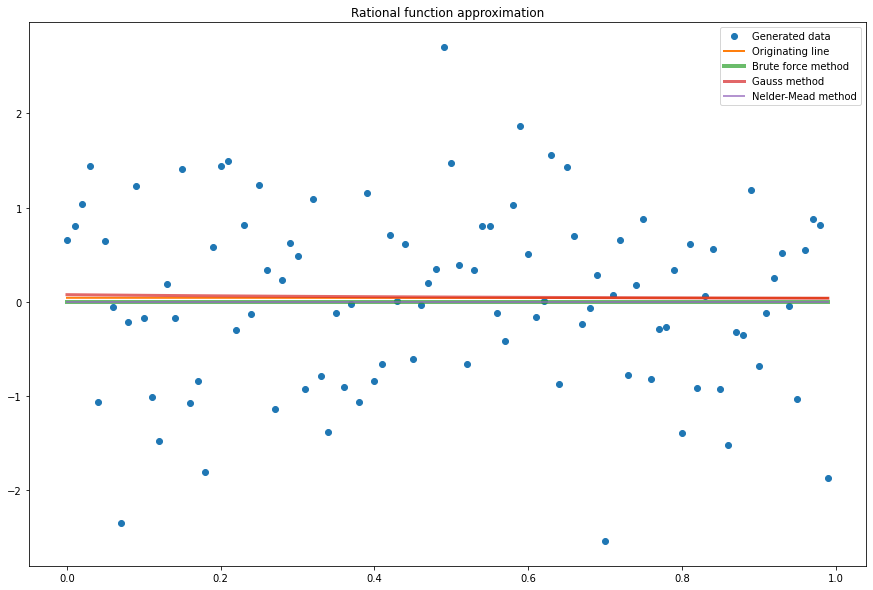

In [83]:
plt.figure(figsize=(15, 10))
plt.plot(noisy_x, noisy_y, 'o', label="Generated data")
plt.plot(noisy_x, rational(noisy_x, a=alpha, b=betta), linewidth=2, label="Originating line")
plt.plot(noisy_x, rational(noisy_x, a=a_r, b=b_r) , linewidth=4, alpha=0.7,
         label="Brute force method")
plt.plot(noisy_x, rational(noisy_x, a=a_r_g, b=b_r_g), linewidth=3, alpha=0.7,
         label="Gauss method")
plt.plot(noisy_x, rational(noisy_x, a=b_n_r, b=b_n_r), linewidth=2, alpha=0.7,
         label="Nelder-Mead method")
plt.title('Rational function approximation')
plt.legend()
plt.savefig('./Pictures/task2_rational_approx', bbox_inches='tight')
plt.show()